In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import os 
path = ('/Users/gabriel/Desktop/Students_Project/Student-Marks-Project')
os.chdir(path)

In [4]:
pwd

'/Users/gabriel/Desktop/Students_Project/Student-Marks-Project'

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df.describe(include = 'all').round(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.09,69.17,68.05
std,NaN,NaN,NaN,NaN,NaN,15.16,14.60,15.20
min,NaN,NaN,NaN,NaN,NaN,0.00,17.00,10.00
25%,NaN,NaN,NaN,NaN,NaN,57.00,59.00,57.75
50%,NaN,NaN,NaN,NaN,NaN,66.00,70.00,69.00
75%,NaN,NaN,NaN,NaN,NaN,77.00,79.00,79.00


In [6]:
df.shape

(1000, 8)

In [7]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isna().sum() #No missing data

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Categorical Data

## Gender

In [10]:
print(df['gender'].unique())

['female' 'male']


Text(0.5, 1.0, 'Gender')

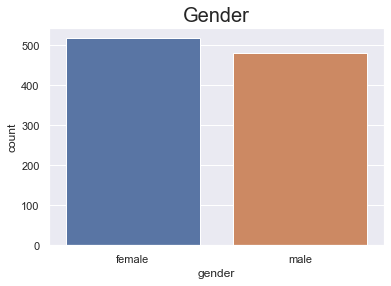

In [11]:
h = sns.countplot(x = 'gender', data = df)
plt.title('Gender',fontsize = 20)

## Race/Ethnicity

In [12]:
print(df['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group B'),
  Text(1, 0, 'group C'),
  Text(2, 0, 'group A'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

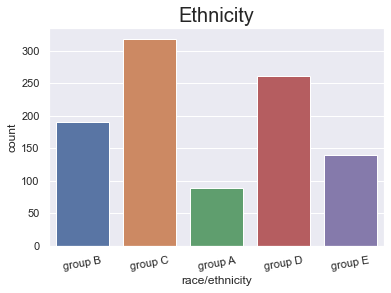

In [13]:
sns.countplot(x = 'race/ethnicity', data = df)
plt.title('Ethnicity',fontsize = 20)
plt.xticks(rotation = 10)

## Parental level of education

In [14]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

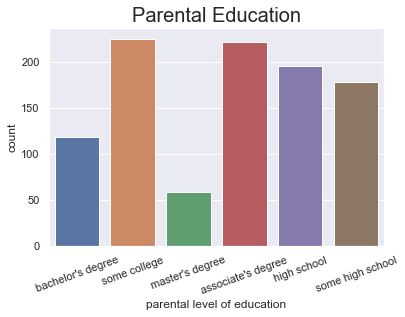

In [15]:
sns.countplot(x = 'parental level of education', data = df)
plt.title('Parental Education',fontsize = 20)
plt.xticks(rotation = 20)

## Lunch

In [16]:
print(df['lunch'].unique())

['standard' 'free/reduced']


Text(0.5, 1.0, 'Lunch')

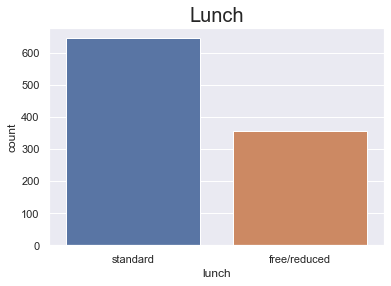

In [17]:
sns.countplot(x = 'lunch', data = df)
plt.title('Lunch',fontsize = 20)


## Test Preparation

In [18]:
print(df['test preparation course'].unique())

['none' 'completed']


Text(0.5, 1.0, 'Test Preparation')

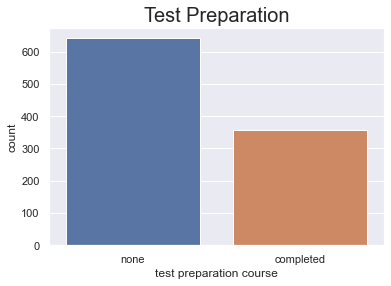

In [19]:
sns.countplot(x = 'test preparation course', data = df)
plt.title('Test Preparation',fontsize = 20)

# Gender Analysis

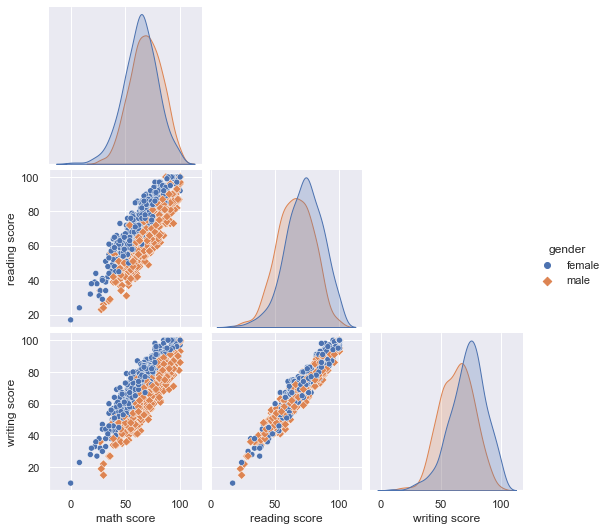

In [20]:
sns.pairplot(df, hue = 'gender',kind = "scatter",corner = True, markers = ['o','D'])
plt.show()

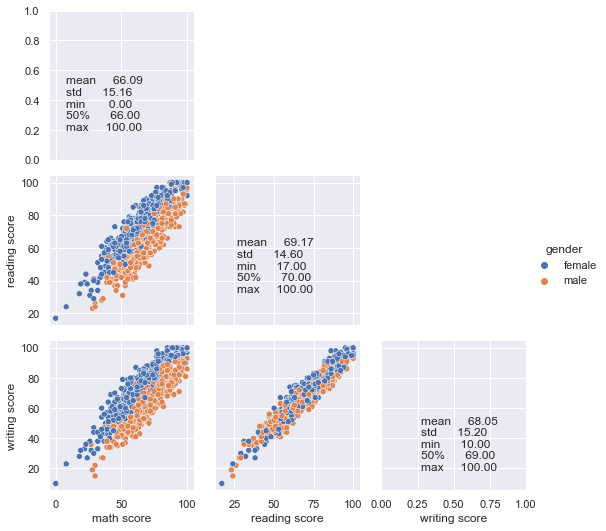

In [21]:
pgrid = sns.PairGrid(df, hue = 'gender', corner = True)
pgrid = pgrid.map_offdiag(sns.scatterplot)

(plt.figtext(0.12,0.75, 
df['math score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))

(plt.figtext(0.4,0.45,
df['reading score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))

(plt.figtext(0.7,0.12,
df['writing score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))

pgrid = pgrid.add_legend()

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'math score'),
  Text(0, 1.5, 'reading score'),
  Text(0, 2.5, 'writing score')])

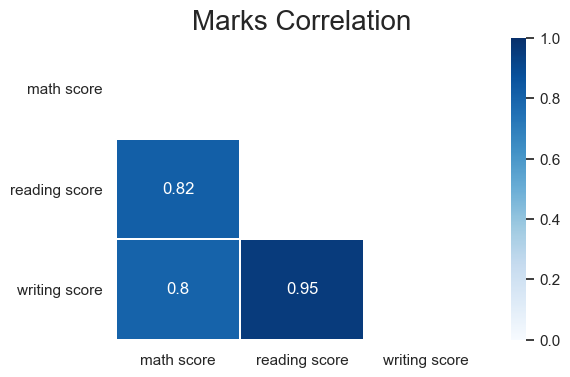

In [22]:
correlation = df.corr()#Compute pairwise correlation of columns
mask = np.triu(np.ones_like(correlation,dtype = bool))
sns.set_style(style = 'white')

plt.figure(edgecolor = 'black',dpi = 100) #figure resolution
sns.heatmap(correlation, mask = mask, vmin = 0,vmax = 1,annot = True,lw = 1, linecolor = 'white',cmap = 'Blues')
plt.title('Marks Correlation',fontsize = 20)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
#print(correlation)

In [23]:
#Map data where male is 0 and female is 1
data_mapped = df.copy()
data_mapped['gender'] = data_mapped['gender'].map({'male':0,'female':1})
data_mapped.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44


In [24]:
data_mapped_2 = data_mapped.iloc[:,0:1]
data_mapped_2.head(5)

,gender
0,1
1,1
2,1
3,0
4,0


## Marks Average

In [25]:
#Average marks
mean_marks_math= np.mean(df['math score'])
mean_marks_reading= np.mean(df['reading score'])
mean_marks_writing= np.mean(df['writing score'])
print('Maths mean:',mean_marks_math,
      'Reading mean:',mean_marks_reading,
      'Writing mean:', mean_marks_writing)


Maths mean: 66.089 Reading mean: 69.169 Writing mean: 68.054


In [26]:
average = ((df['math score']+df['writing score']+df['reading score'])/3).round(2)
average.head()

0    72.67
1    82.33
2    92.67
3    49.33
4    76.33
dtype: float64

In [27]:
data_mapped_2['gender'].value_counts()#Return a Series containing counts of unique values.

1    518
0    482
Name: gender, dtype: int64

We have 518 Females and 482 males.